In [2]:
# Let's read in the data file

library(readr)
data1 <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv", show_col_types = FALSE)

In [4]:
# The first 10 rows

head(data1, 10)

TV,Radio,Newspaper,Sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2
57.5,32.8,23.5,11.8
120.2,19.6,11.6,13.2
8.6,2.1,1.0,4.8


In [5]:
# Convert to data frame and summarize 


summary(data1)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

In [ ]:
#EXAMINE CORRELATIONS

#NOT DONE

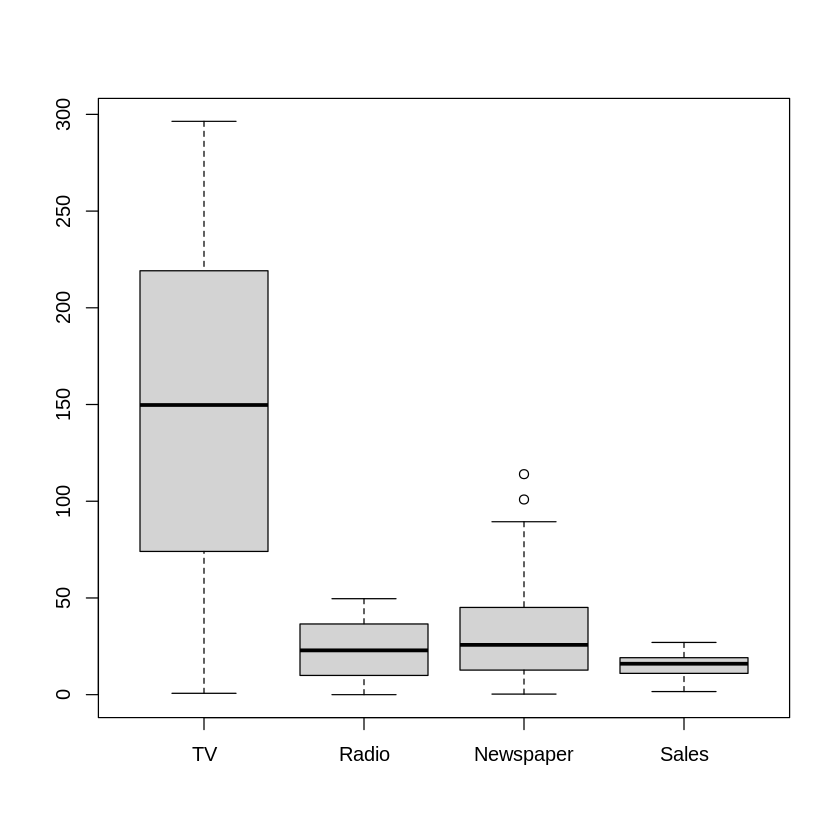

In [6]:
#EXAMINE FEATURES WITH BOXPLOTS
boxplot(data1)

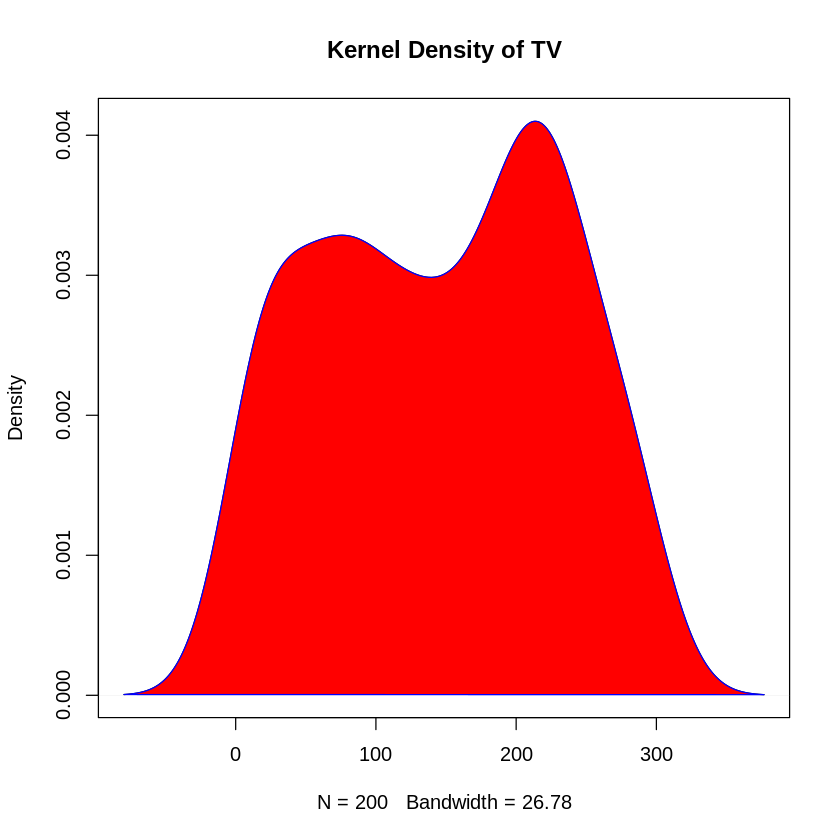

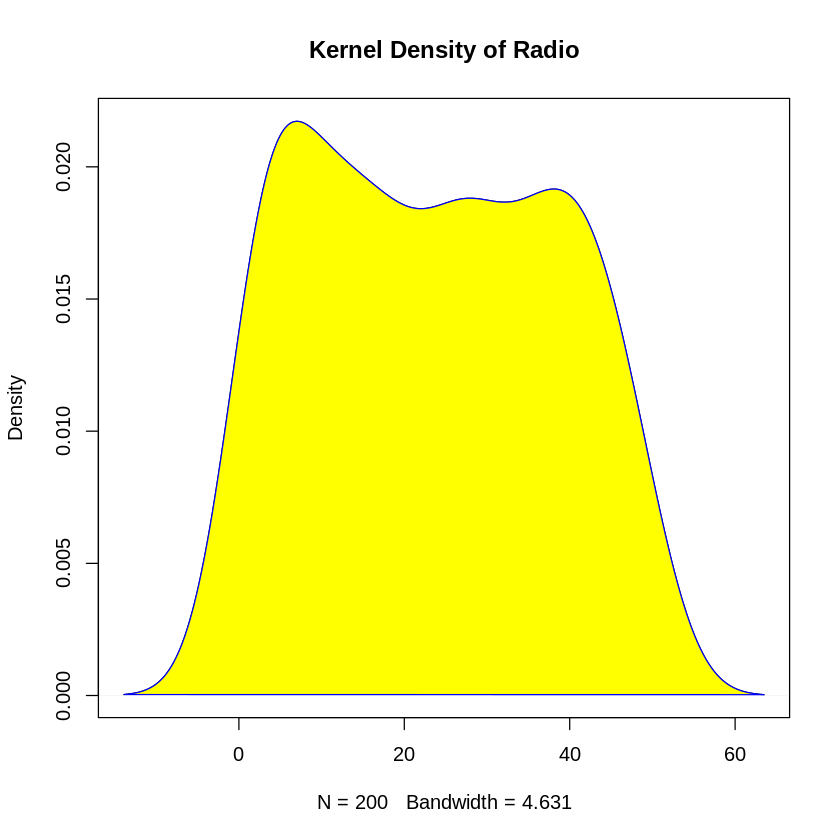

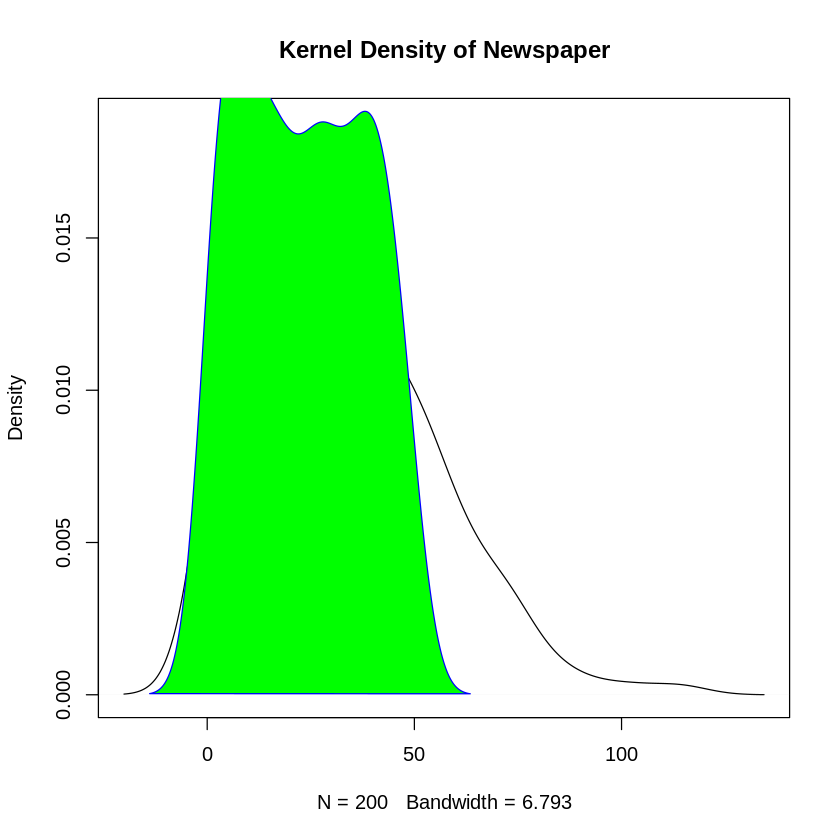

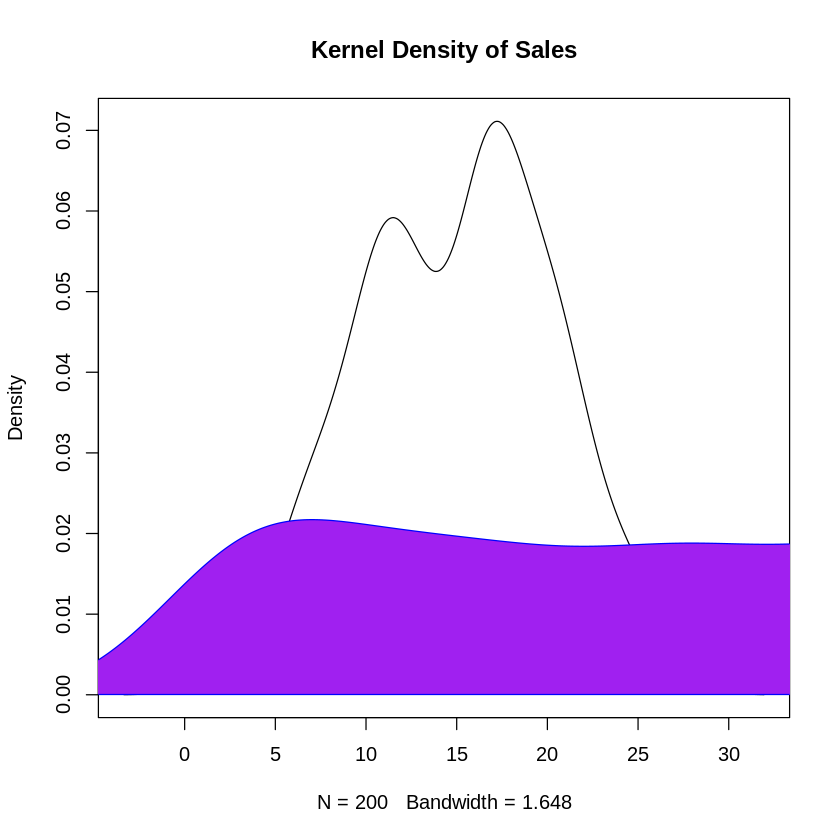

In [7]:
#Examine Feature Distributions
# plotting histogram and  kernel density estimates 

# Kernel Density Plot
d1 <- density(data1$TV) 

# plots the results
plot(d1, main="Kernel Density of TV") 

# plots the results (filled)
polygon(d1, col="red", border="blue")


# Kernel Density Plot
d2 <- density(data1$Radio) 

# plots the results
plot(d2, main="Kernel Density of Radio") 

# plots the results (filled)
polygon(d2, col="yellow", border="blue")
#
# Kernel Density Plot
d3 <- density(data1$Newspaper) 

# plots the results
plot(d3, main="Kernel Density of Newspaper") 

# plots the results (filled)
polygon(d2, col="green", border="blue")
#
# Kernel Density Plot
d3 <- density(data1$Sales) 

# plots the results
plot(d3, main="Kernel Density of Sales") 

# plots the results (filled)
polygon(d2, col="purple", border="blue")

In [8]:
#Check for Missing Values
# Does $age have any missing values?

sum(is.na(data1))
#no

[1] 0

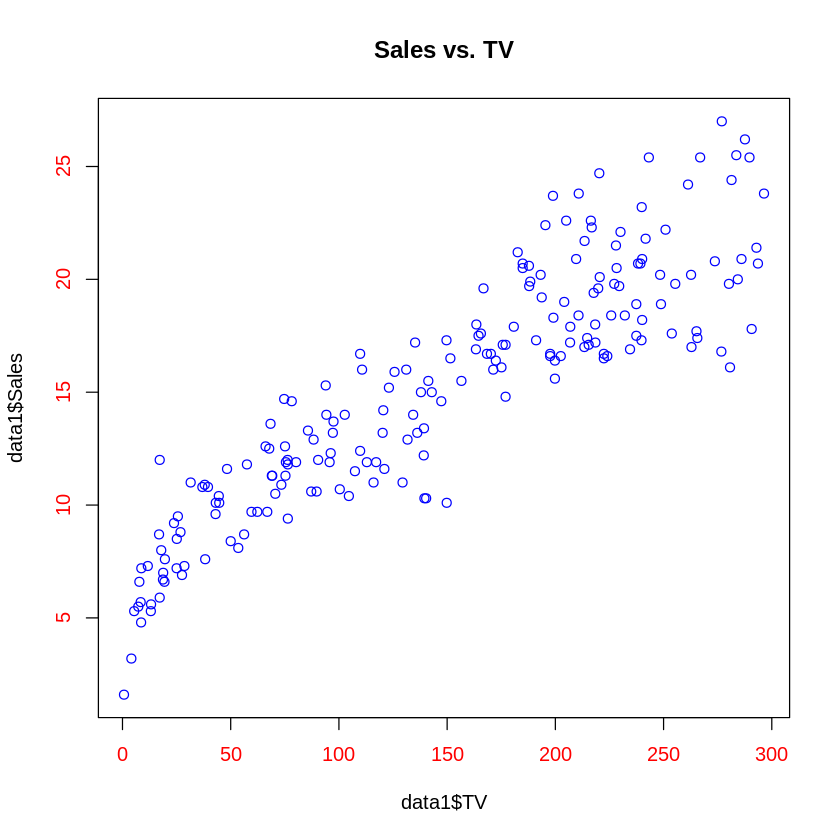

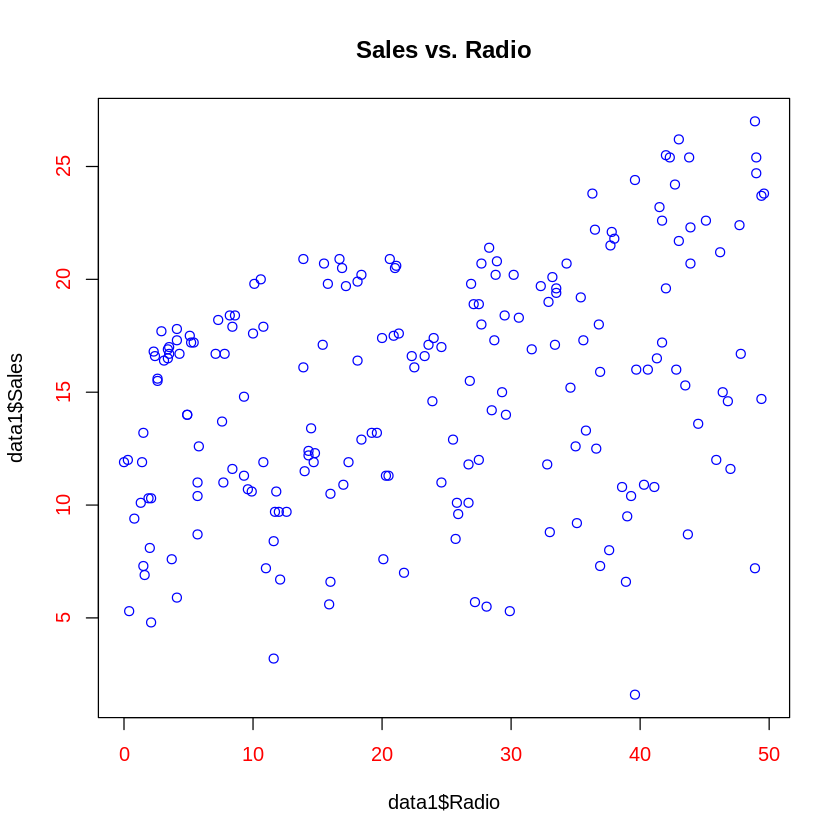

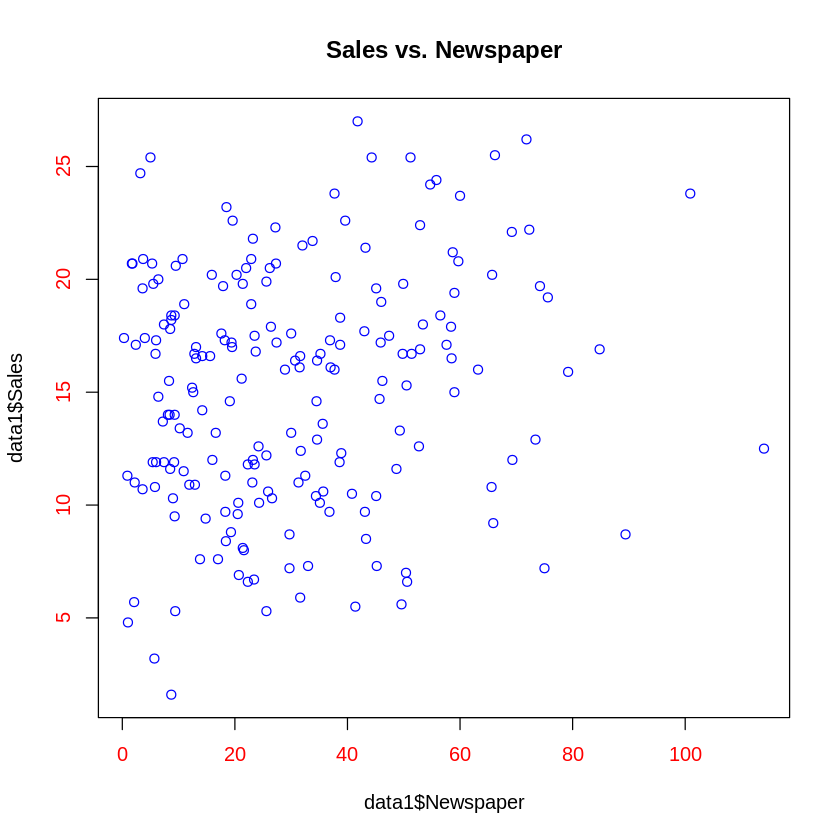

In [9]:
# lets build the linear regression model
#the target varible will be the sales column

#y = f(x), where
#y (dependent parameter) = Sales

#x (independent parameter) = TV, Radio, or NewsPaper

plot(y = data1$Sales, x = data1$TV,
   col = "blue",
   col.axis = "red",
   main = "Sales vs. TV")
   #
   plot(y = data1$Sales, x = data1$Radio,
   col = "blue",
   col.axis = "red",
   main = "Sales vs. Radio")
    #
   plot(y = data1$Sales, x = data1$Newspaper,
   col = "blue",
   col.axis = "red",
   main = "Sales vs. Newspaper")

Use The Entire Data Set For Training

In [10]:
#model <- lm(Sales ~ TV, data = data1 )
#summary(model)
coef(lm(Sales ~ TV, data1))

#from this code O can see that the intercept is 6.974821 and that the slope is 0.055465
#https://www.statology.org/lm-function-in-r/

(Intercept)          TV 
 6.97482149  0.05546477

In [11]:
ml = lm(TV~Sales, data = data1) 
 
summary(ml)$r.squared 
#this is the R2 score

[1] 0.8121757

In [ ]:
#cant figure out MSE

In [13]:
#read in iris dataset 
   
 library(caret) #this package has the createDataPartition function
    
 set.seed(123) #randomization`
    
 #creating indices
 trainIndex <- createDataPartition(data1$Sales,p=0.70,list=FALSE)
    
 #splitting data into training/testing data using the trainIndex object
 IRIS_TRAIN <- iris[trainIndex,] #training data (75% of data)
    
 IRIS_TEST <- iris[-trainIndex,] #testing data (25% of data)


 #not right
 

ERROR: ignored

In [14]:

dim(IRIS_TEST)
dim(IRIS_TRAIN)

ERROR: ignored

In [15]:
# 70% of 200 cases are used for training now.....# 30% of 200 cases are set aside for testing


install.packages('caTools')
library(caTools)
split = sample.split(data1$Sales , SplitRatio = 0.70)
training_set = subset(data1,  split ==TRUE)
test_set = subset(data1,  split ==FALSE)
#https://www.youtube.com/watch?v=pDgTMl0Ed0Q
##Sample the dataset. The return for this is row nos.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [16]:
dim(training_set)
dim(test_set)

[1] 140   4

[1] 60  4

In [19]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(data1), 0.7*nrow(data1))  # row indices for training data
trainingData <- data1[trainingRowIndex, ]  # model training data
testData  <- data1[-trainingRowIndex, ]   # test data
lmMod <- lm(Sales ~ TV, data=trainingData)  # build the model
distPred <- predict(lmMod, testData)  # predict distance
summary (lmMod)  


Call:
lm(formula = Sales ~ TV, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2430 -1.4717  0.0182  1.4838  5.0843 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.16784    0.38989   18.38   <2e-16 ***
TV           0.05406    0.00225   24.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.28 on 138 degrees of freedom
Multiple R-squared:  0.8071,	Adjusted R-squared:  0.8057 
F-statistic: 577.4 on 1 and 138 DF,  p-value: < 2.2e-16


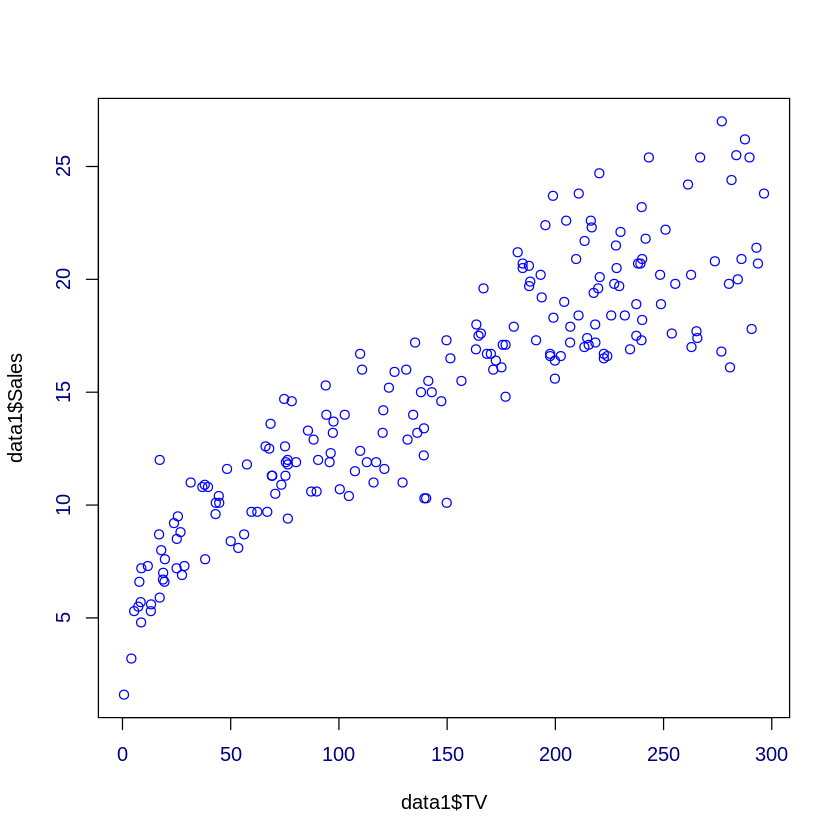

In [24]:
plot(y = data1$Sales, x = data1$TV,
   col = "blue",
   col.axis = "navy",
   main = "Model for Sales and TV")

In [26]:
#2.
# a. sales vs tv 
coef(lm(Sales ~ TV, data1))
ml = lm(TV~Sales, data = data1) 
 
summary(ml)$r.squared 
#this is the R2 score

#from this code O can see that the intercept is 6.974821 and that the slope is 0.055465 and r2 is 0.812175702998741

(Intercept)          TV 
 6.97482149  0.05546477

[1] 0.8121757

In [27]:
# b. sales vs radio 
coef(lm(Sales ~ Radio, data1))
ml = lm(TV~Radio, data = data1) 
 
summary(ml)$r.squared 
#this is the R2 score

#from this code you can see that the intercept is 12.2357219663692 and that the slope is 0.124431655503386 and r2 is 0.00300398970052795

(Intercept)       Radio 
 12.2357220   0.1244317

[1] 0.00300399

In [29]:
# b. sales vs Newspaper 
coef(lm(Sales ~ Newspaper , data1))
ml = lm(TV~Newspaper , data = data1) 
 
summary(ml)$r.squared 
#this is the R2 score

#from this code you can see that the intercept is 13.9595486535544 and that the slope is 013.9595486535544and r2 is 0.00320898173805674

(Intercept)   Newspaper 
  13.959549    0.038324

[1] 0.003208982